In [1]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
import pandas as pd
tokenizer = AutoTokenizer.from_pretrained("D:/jupyter/BERT/biobert_QA/")
model = AutoModelForQuestionAnswering.from_pretrained("D:/jupyter/BERT/biobert_QA/")


D:\Anaconda3\envs\transformer\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\transformer\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\transformer\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\transformer\lib\site-packages\tensorflow\python\framework\dtypes.py:526: 

In [4]:
df = pd.read_excel('D:/jupyter/labels_for_all_sent.xlsx')
print(len(df))

1048575


In [3]:
df = pd.read_excel('D:/jupyter/labels_for_all_sent.xlsx')
df = df[df['labels']>0]
print(len(df))
df.to_excel('D:/jupyter/positive_sent.xlsx')
                

39150


In [4]:
df = pd.read_excel('D:/jupyter/positive_sent.xlsx')
sentences = df.sentence
len(sentences)

39150

In [5]:
question = "What is the risk factor?"

answers = []
score1 = []
score2 = []
num = 0
for text in sentences:
    if num%200==0:
        print(num)
    num = num + 1
    inputs = tokenizer.encode_plus(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs)
    answer_start = torch.argmax(
        answer_start_scores
    )  # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    answers.append(answer)
    score1.append(float(answer_start_scores[0][answer_start]))
    score2.append(float(answer_end_scores[0][answer_end]))

df_save = pd.DataFrame({'sentence':sentences, 'risk factor': answers, 'score1':score1, 'score2':score2})
df_save.to_excel('D:/jupyter/positive_sent_QA.xlsx')

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28800
29000
29200
29400
29600
29800
30000
30200
30400
30600
30800
31000
31200
31400
31600
31800
32000
32200
32400
32600
32800
33000
33200
33400
33600
33800
34000
34200
34400
34600
34800
35000
3

In [3]:
import pandas as pd
import re
def containenglish(str0):
    return bool(re.search('[a-z]', str0))

def good_rf(sent):
    if '[CLS]' not in sent and '[SEP]' not in sent and 'covid' not in sent and '2019 - ncov' not in sent and 'sars' not in sent and 'risk factor' not in sent and 'nan' not in sent and containenglish(sent):
        return True
    else:
        return False
    
df = pd.read_excel('D:/jupyter/positive_sent_QA.xlsx')
indexs = []
for i in range(len(df)):
    risk_factor = df.iloc[i,2]
    if len(str(risk_factor)) > 3 and good_rf(str(risk_factor)):
        indexs.append(i)
newdf = df.iloc[indexs,:]
newdf['length'] = newdf['risk factor'].str.len()
newdf.to_excel('D:/jupyter/positive_sent_QA_fine_ver.xlsx') 
print(len(newdf))

D:\Anaconda3\envs\transformer\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


20280


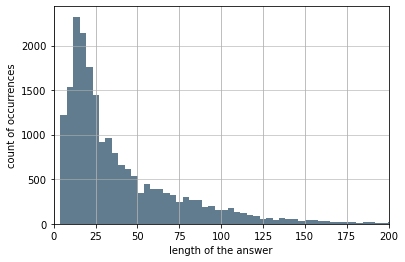

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
lengths = newdf.length
lengths.plot.hist(grid=True, bins=100, rwidth=1, color='#607c8e')
plt.xlabel('length of the answer')
plt.ylabel('count of occurrences')
plt.xlim(0,200)
plt.grid(axis='y', alpha=0.75)


In [5]:
num1 = 0
num2 = 0
num3 = 0
lengths = lengths.values
for i in range(len(lengths)):
    if lengths[i] < 50:
        num1 += 1
    elif lengths[i] < 100:
        num2 += 1
    else:
        num3 += 1
print(len(lengths))
print(f"长度小于50的占{num1/len(lengths)}%")
print(f"长度大于50，小于100的占{num2/len(lengths)}%")
print(f"长度大于100的占{num3/len(lengths)}%")

20280
长度小于50的占0.7273175542406312%
长度大于50，小于100的占0.19743589743589743%
长度大于100的占0.0752465483234714%


<BarContainer object of 46 artists>

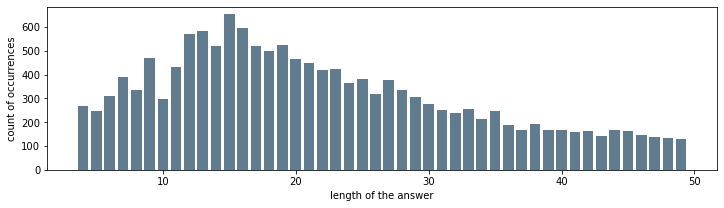

In [15]:
answer_len = list(range(4, 50))
answer_num = [0] * len(answer_len)
for i in range(len(lengths)):
    if lengths[i] < 50:
        answer_num[lengths[i] - 4] += 1
plt.figure(figsize=(12, 3))
plt.xlabel('length of the answer')
plt.ylabel('count of occurrences')
plt.bar(answer_len, answer_num, color='#607c8e')


In [10]:
risk_factors = newdf['risk factor'].values
result = pd.DataFrame(pd.value_counts(risk_factors))
result.to_excel('risk_factor_count.xlsx')
            

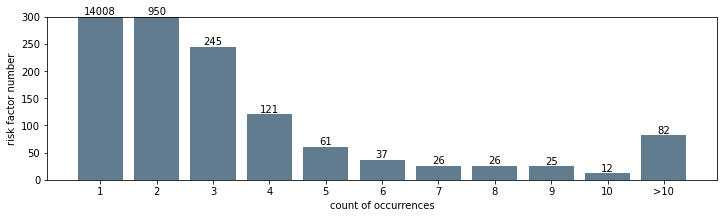

In [23]:
occur_time = ['1','2','3','4','5','6','7', '8', '9', '10', '>10']
risk_factor_num = [14008, 950, 245, 121, 61, 37, 26, 26, 25, 12, 82]
plt.figure(figsize=(12, 3))
plt.xlabel('count of occurrences')
plt.ylabel('risk factor number')
plt.ylim(0,300)
plt.bar(occur_time, risk_factor_num, color='#607c8e')
for a, b in zip(occur_time, risk_factor_num):
    if b>300:
        b1 = 300
    else:
        b1 = b
    plt.text(a, b1 + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)

In [28]:

temp1 = tokenizer.tokenize('I Love You')
print(temp1)
temp11 = tokenizer.encode(temp1)
print(temp11)
temp2 = tokenizer.convert_ids_to_tokens(temp11)
print(temp2)
temp3 = tokenizer.convert_tokens_to_string(temp2)
print(temp3)

['i', 'love', 'you']
[101, 178, 1567, 1128, 102]
['[CLS]', 'i', 'love', 'you', '[SEP]']
[CLS] i love you [SEP]
